In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import numpy as np

In [ ]:
tesla_df = pd.read_csv("/content/drive/MyDrive/tesla.csv")
tesla_df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2074,24-09-2018,298.480011,303.000000,293.579987,299.679993,299.679993,4843000
1067,24-09-2014,251.119995,252.839996,247.039993,252.139999,252.139999,3749500
672,01-03-2013,35.000000,35.080002,34.250000,34.650002,34.650002,1546600
831,16-10-2013,184.899994,187.300003,182.089996,183.559998,183.559998,8205400
42,27-08-2010,19.750000,19.870001,19.500000,19.700001,19.700001,379600


In [ ]:
tesla_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [ ]:
tesla_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [ ]:
tesla_df["Date"] = pd.to_datetime(tesla_df["Date"])
empty = []
for i in tesla_df["Date"]:
  empty.append(i.date())

tesla_df["Date"] = empty
tesla_df["Date"]

0       2010-06-29
1       2010-06-30
2       2010-01-07
3       2010-02-07
4       2010-06-07
           ...    
2188    2019-11-03
2189    2019-12-03
2190    2019-03-13
2191    2019-03-14
2192    2019-03-15
Name: Date, Length: 2193, dtype: object

In [ ]:
year_list = []
month_list = []
day_list = []
for i in tesla_df["Date"]:
  year_list.append(i.year)
  month_list.append(i.month)
  day_list.append(i.day)

tesla_df["year"] = year_list
tesla_df["month"] = month_list
tesla_df["day"] = day_list
tesla_df = tesla_df.sort_values(by = ["year","month","day"], ascending = True).drop(["month","day"],axis = 1)
tesla_df.reset_index(drop = True, inplace = True)
tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year
0,2010-01-07,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2010
1,2010-01-09,19.620001,20.690001,19.600000,20.450001,20.450001,494900,2010
2,2010-01-10,20.690001,20.750000,20.309999,20.600000,20.600000,597700,2010
3,2010-01-11,21.940001,22.750000,21.309999,21.410000,21.410000,455800,2010
4,2010-01-12,35.869999,36.419998,33.450001,34.349998,34.349998,1299200,2010


In [ ]:
tesla_df_grouped = tesla_df.groupby("year")
tesla_df_2010 = tesla_df_grouped.get_group(2010)
tesla_df_2010.shape

(130, 8)

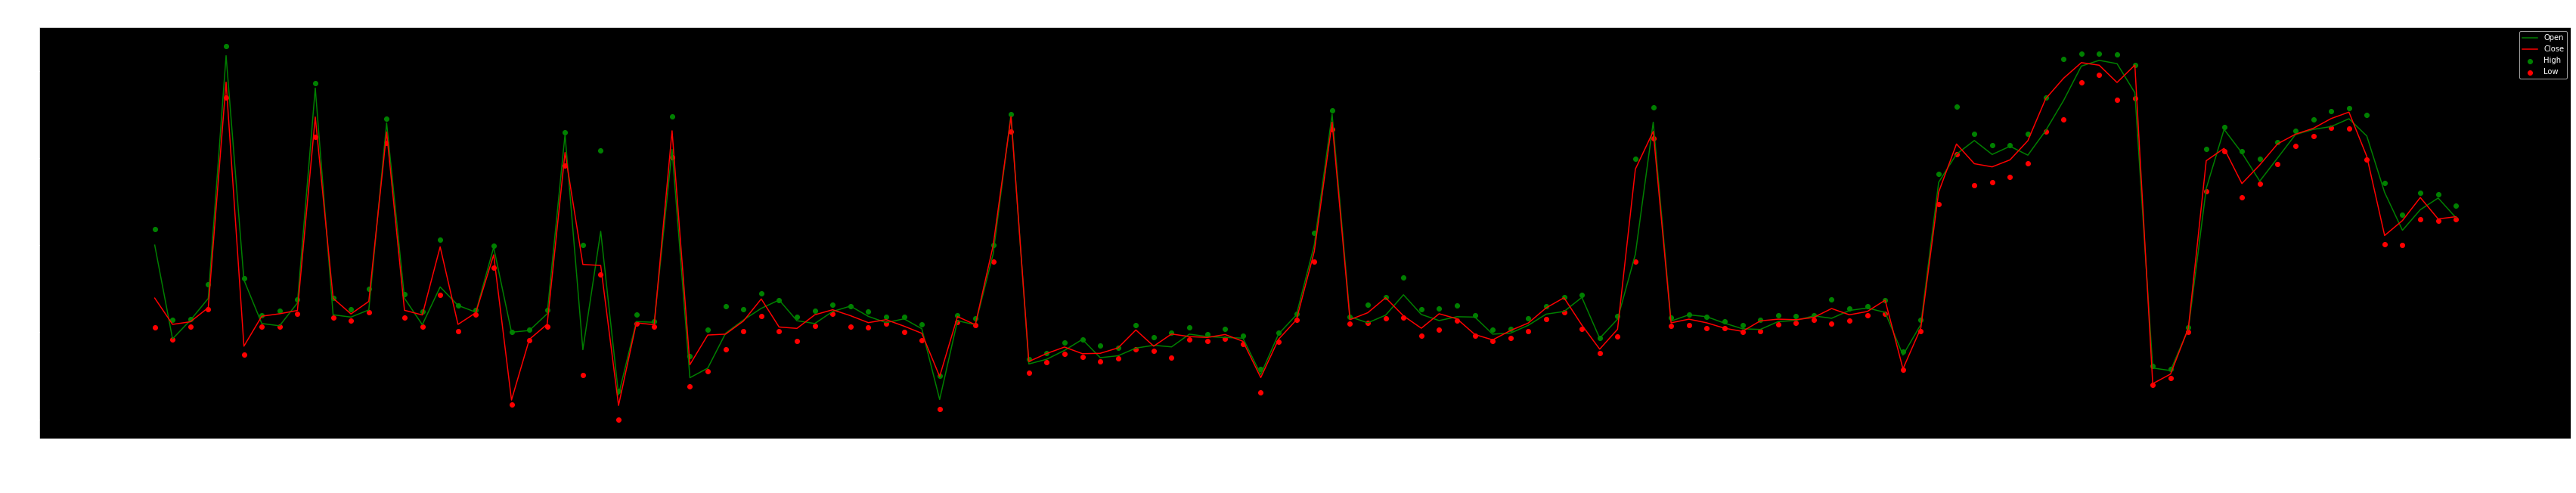

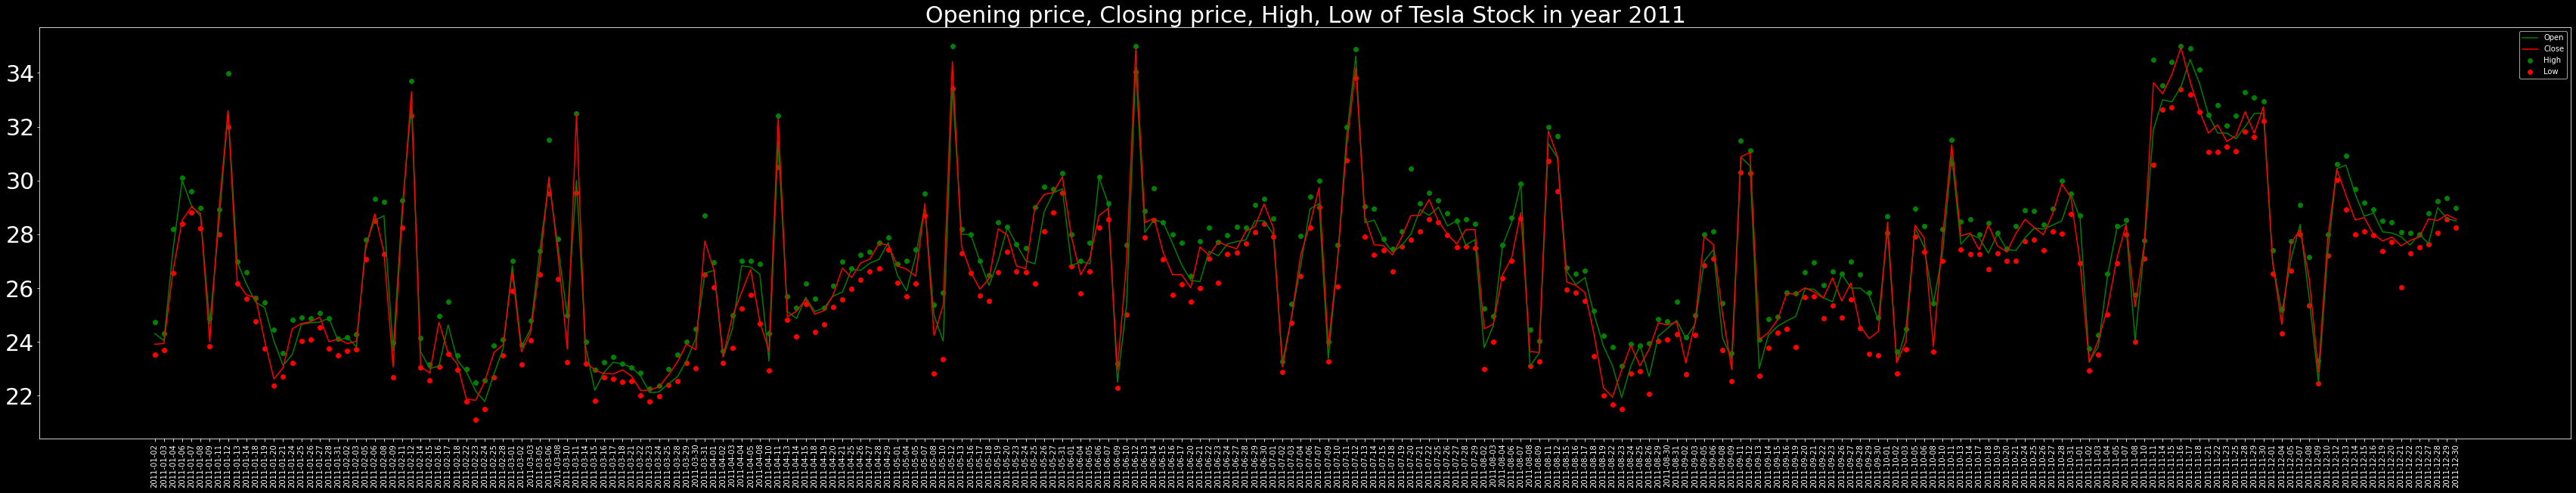

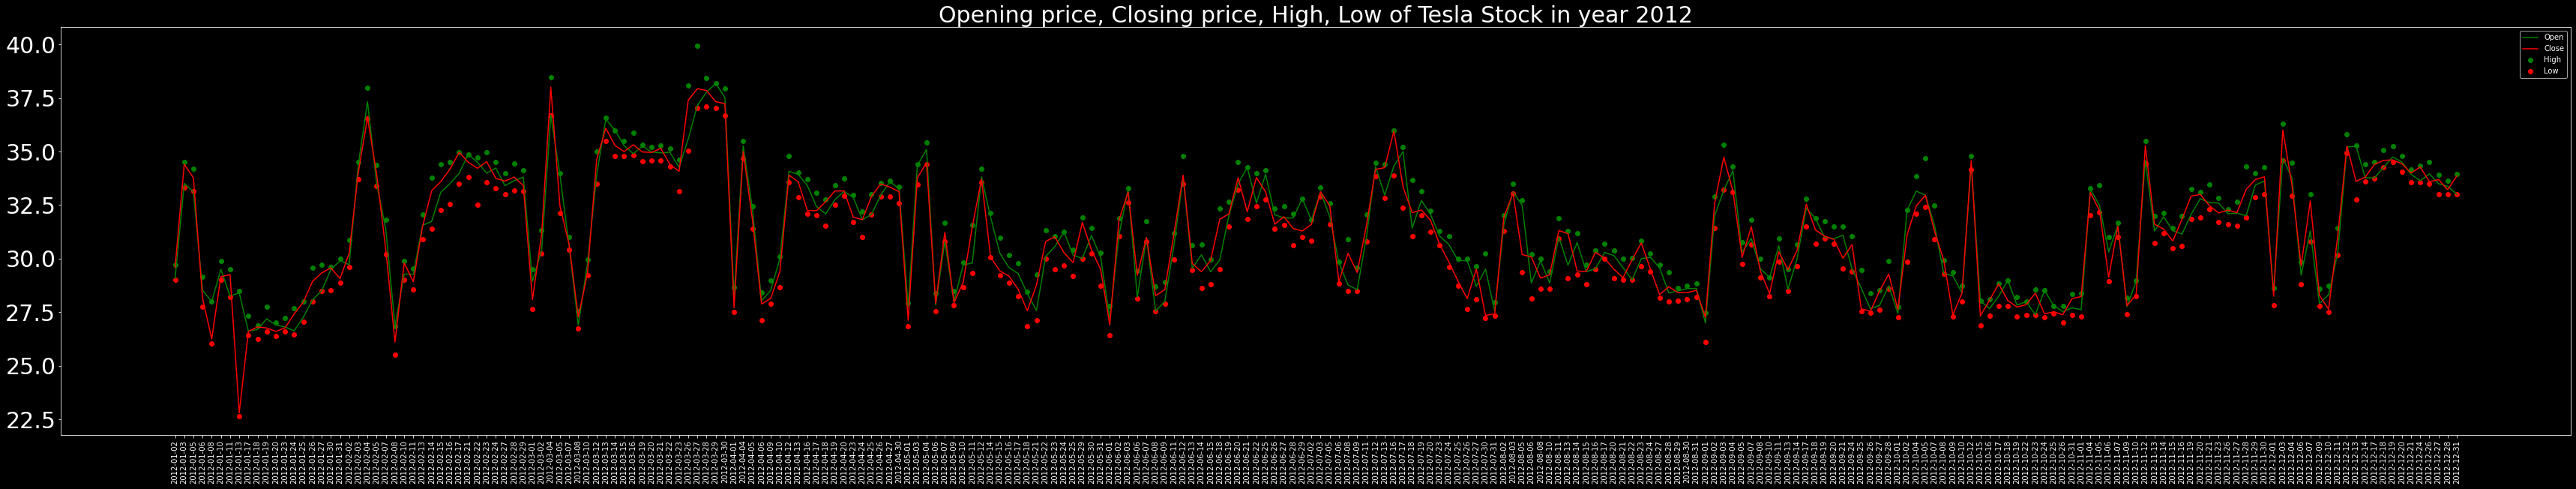

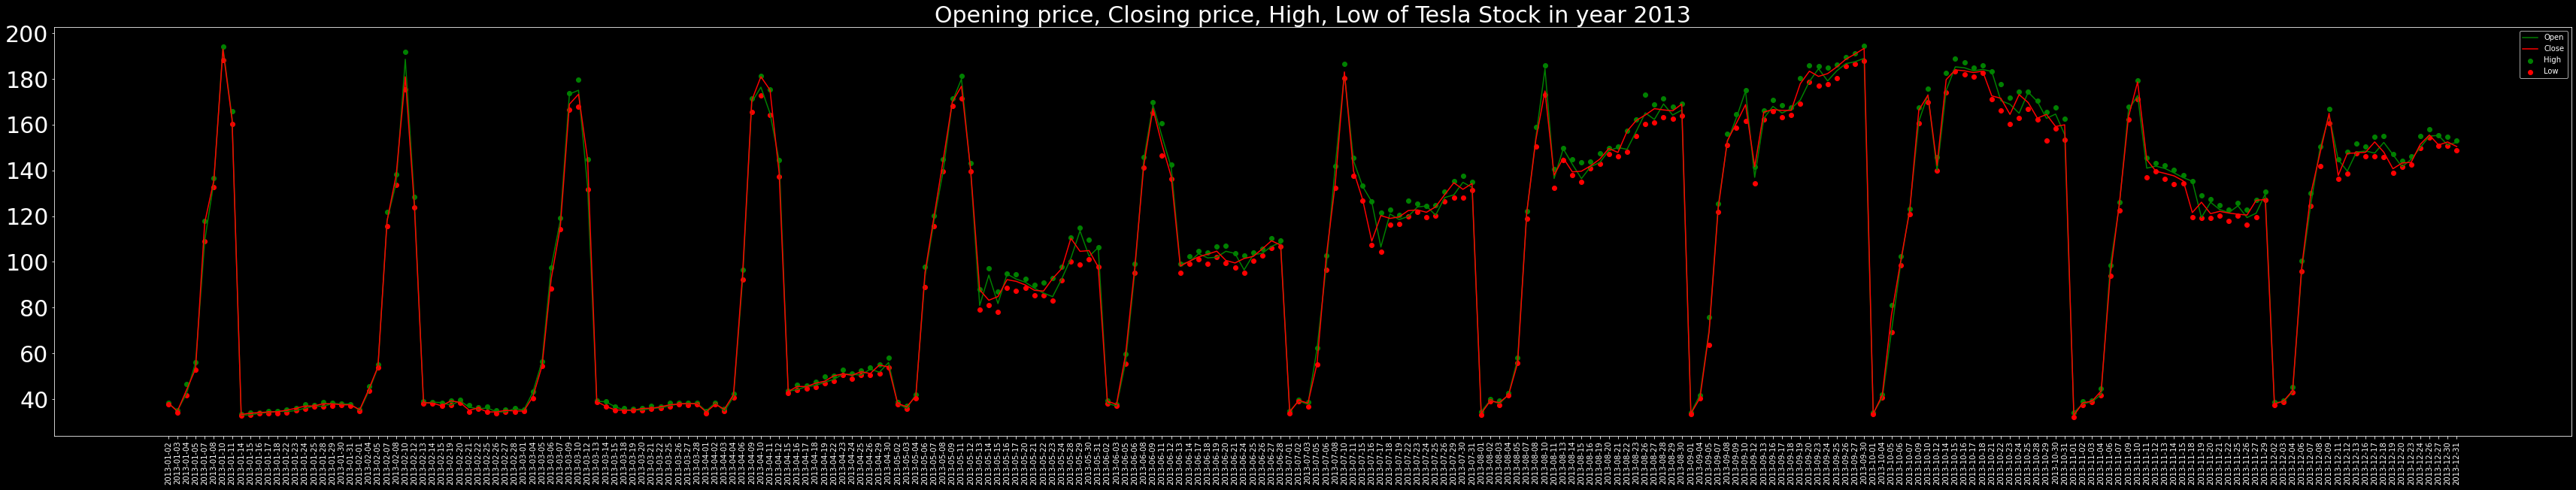

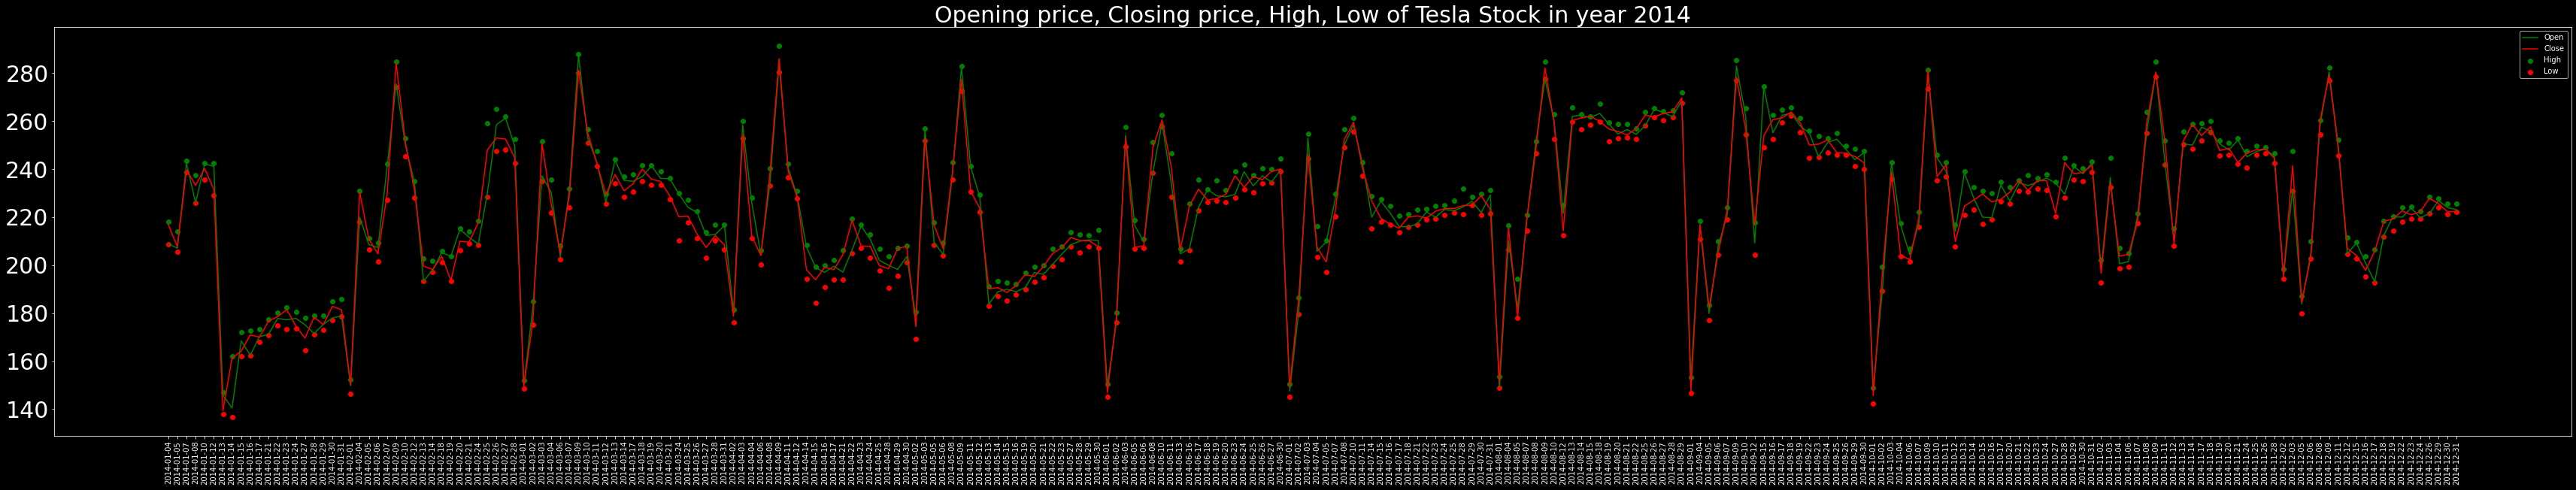

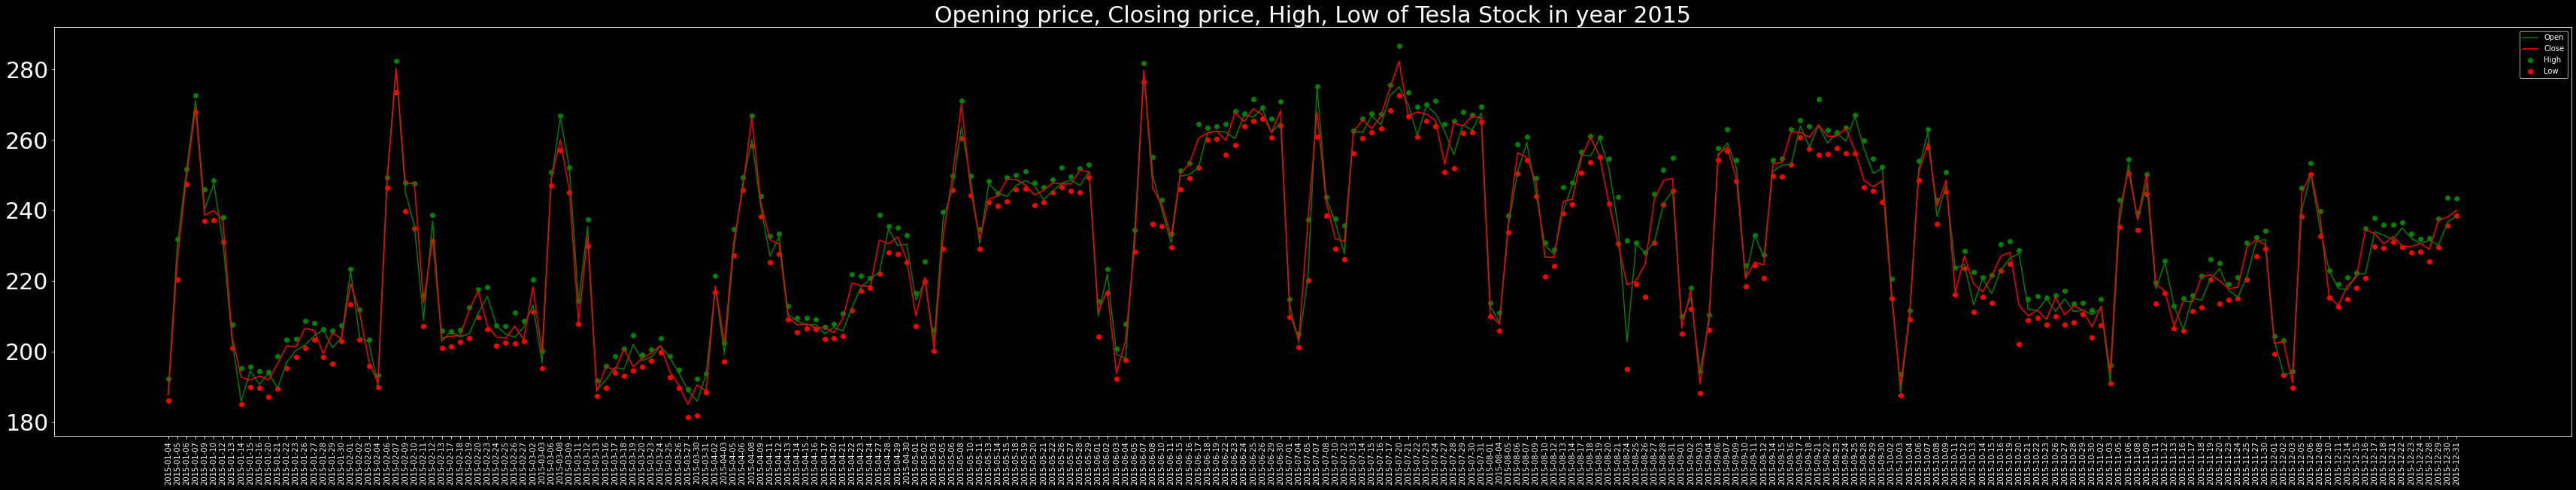

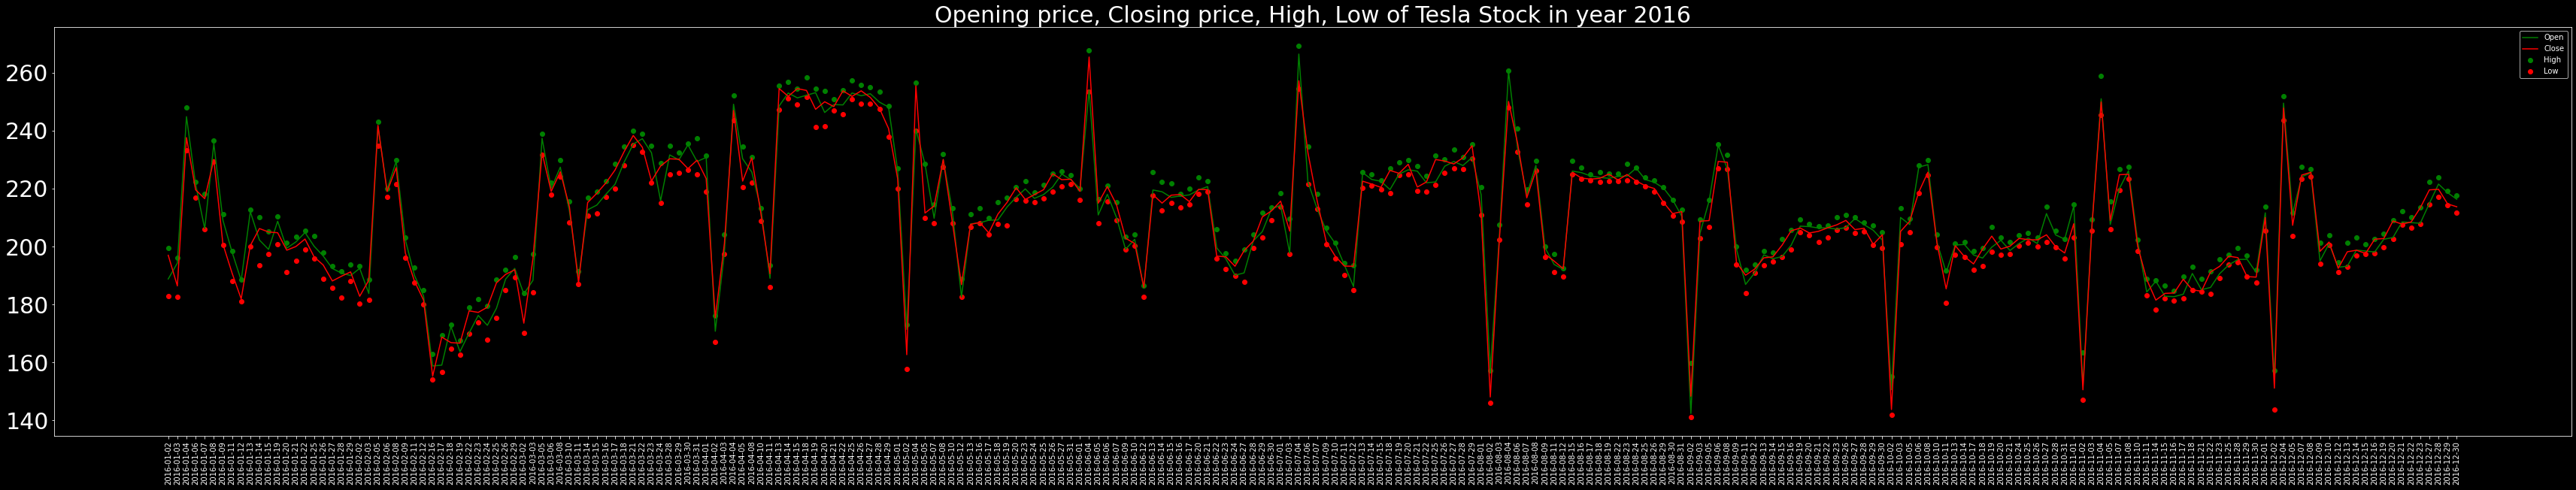

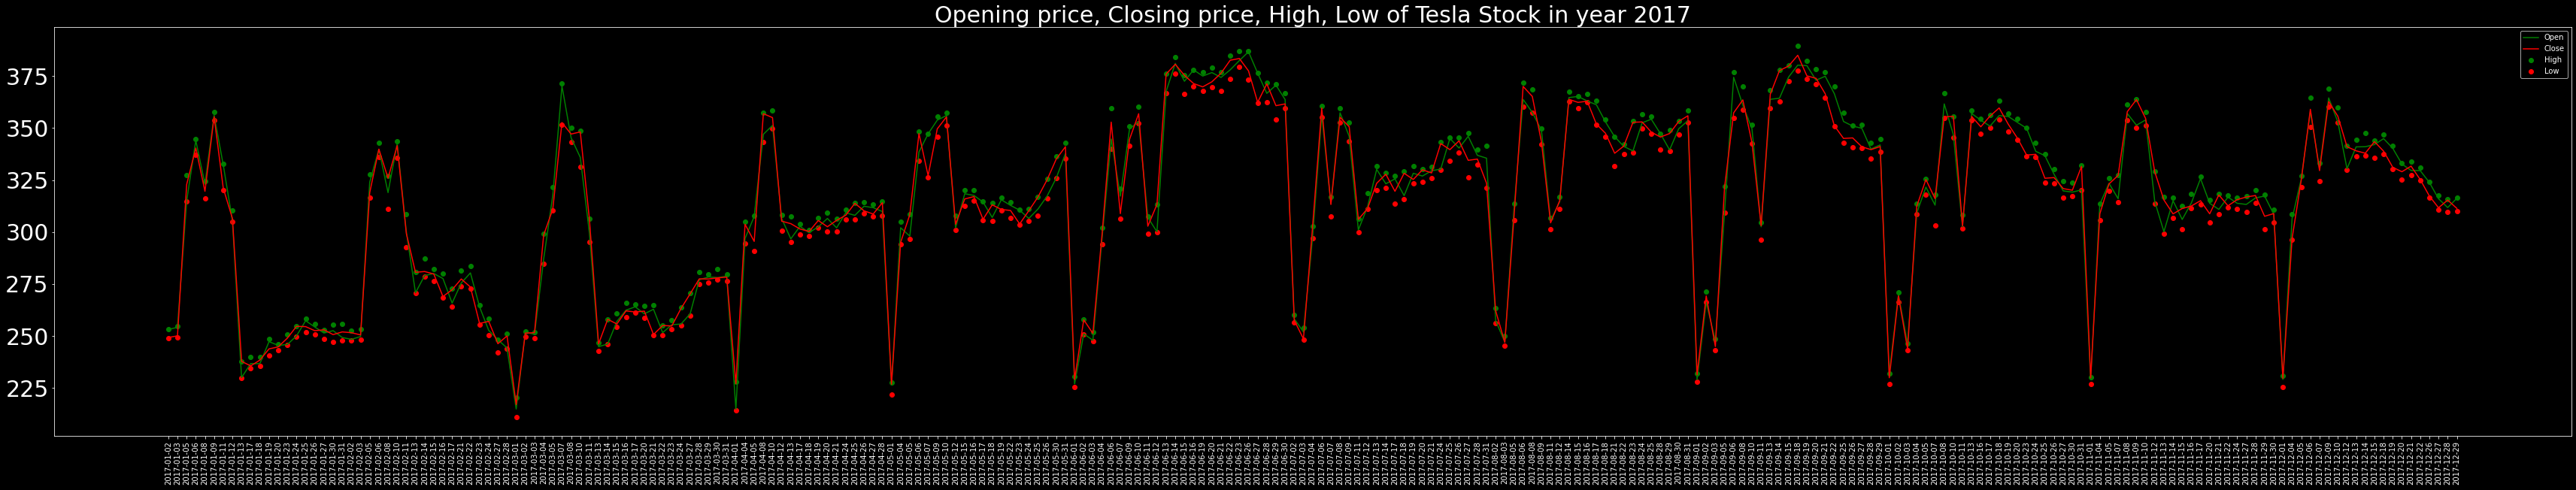

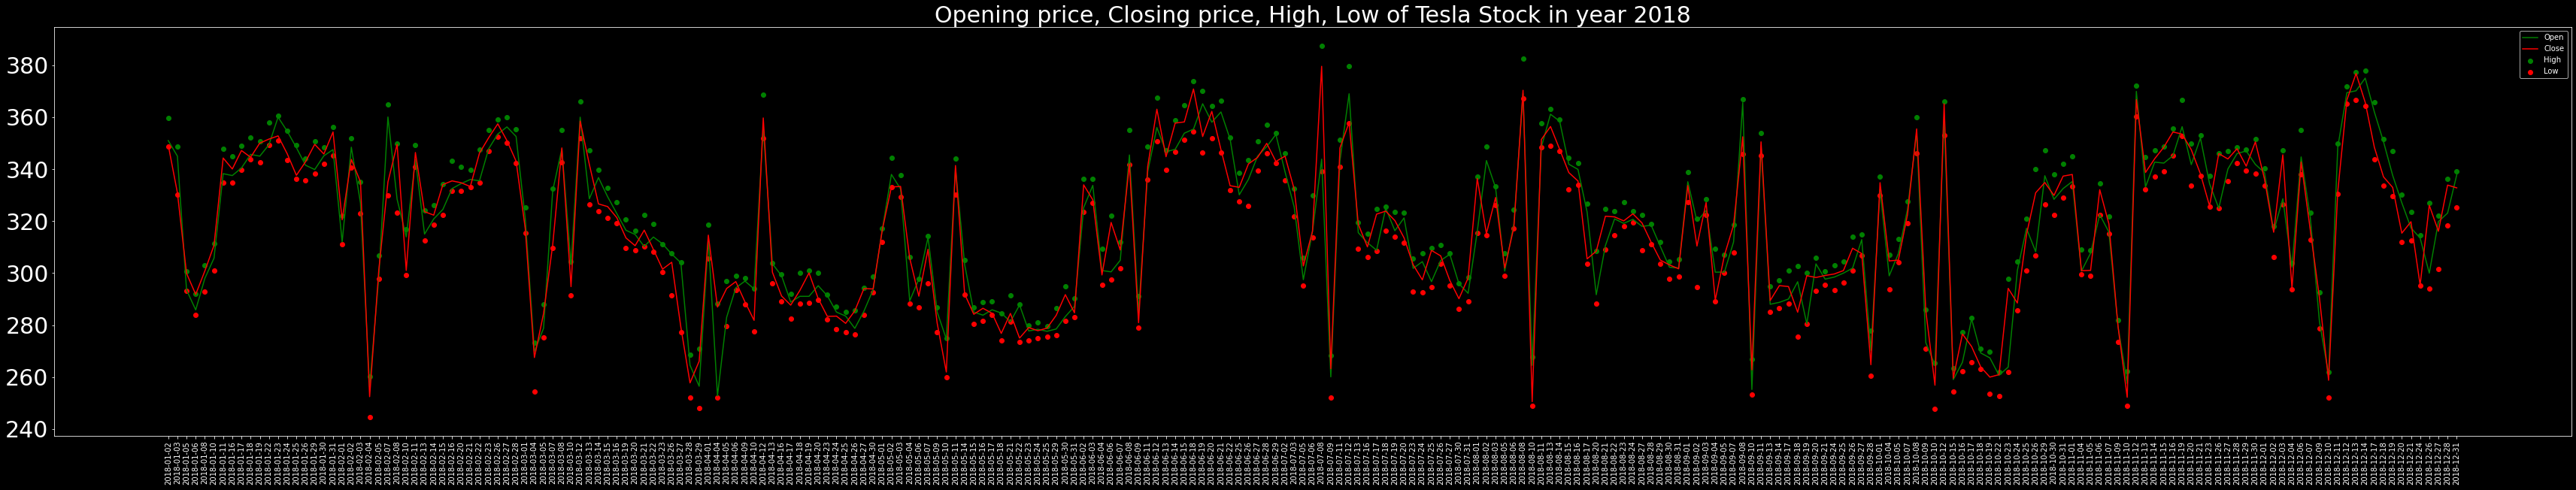

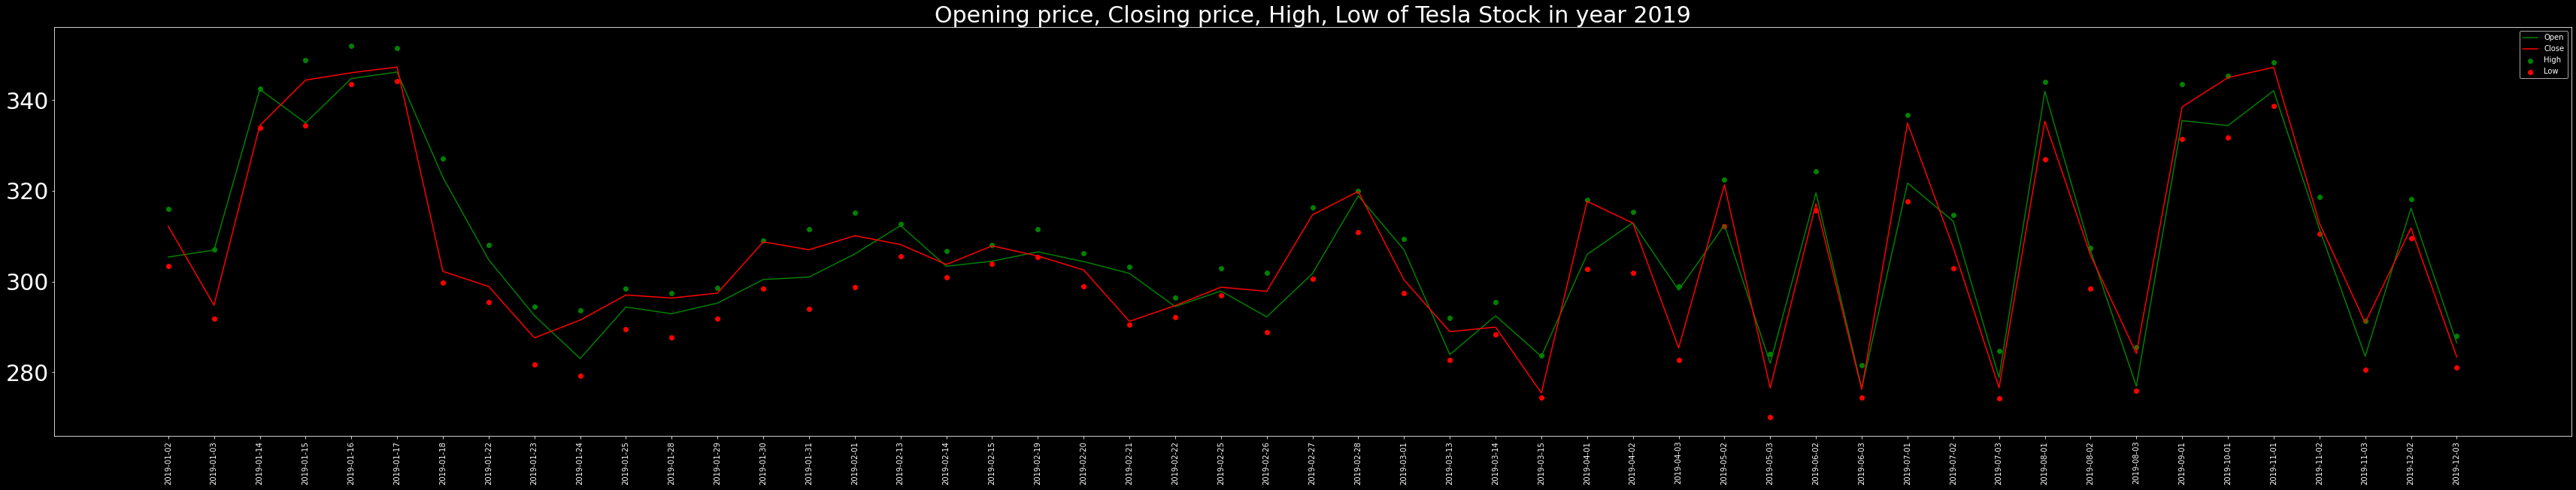

In [ ]:
for i in range(2010,2020):
  plt.figure(figsize = (60,10))
  plt.style.use("dark_background")
  len = tesla_df_grouped.get_group(i).shape[0]
  len += 1
  plt.plot(np.arange(1,len,1), tesla_df_grouped.get_group(i)["Open"], color = "Green")
  plt.plot(np.arange(1,len,1),tesla_df_grouped.get_group(i)["Close"], color = "Red")
  plt.scatter(np.arange(1,len,1), tesla_df_grouped.get_group(i)["High"], color = "Green")
  plt.scatter(np.arange(1,len,1), tesla_df_grouped.get_group(i)["Low"], color = "Red")
  plt.title(f"Opening price, Closing price, High, Low of Tesla Stock in year {i}", fontsize = 30)
  plt.legend(["Open","Close", "High", "Low"])
  plt.xticks(ticks = np.arange(1,len,1), labels = tesla_df_grouped.get_group(i)["Date"], rotation = 90)
  plt.yticks(fontsize = 30)
  plt.show()

In [ ]:
tesla_df_grouped.get_group(2014).head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,year
884,2014-01-04,209.020004,218.160004,208.580002,216.970001,216.970001,7371400,2014
885,2014-01-05,207.080002,214.020004,205.690002,207.729996,207.729996,5439900,2014
886,2014-01-07,242.460007,243.440002,238.699997,239.720001,239.720001,4336100,2014
887,2014-01-08,226.089996,237.500000,226.000000,233.270004,233.270004,11895800,2014
888,2014-01-10,242.199997,242.660004,235.649994,240.240005,240.240005,5941700,2014
889,2014-01-12,241.160004,242.470001,229.009995,231.639999,231.639999,8619400,2014
890,2014-01-13,145.779999,147.000000,137.820007,139.339996,139.339996,6316100,2014
891,2014-01-14,140.500000,162.000000,136.669998,161.270004,161.270004,27607000,2014
892,2014-01-15,168.449997,172.229996,162.100006,164.130005,164.130005,20465600,2014
893,2014-01-16,162.500000,172.699997,162.399994,170.970001,170.970001,11959400,2014


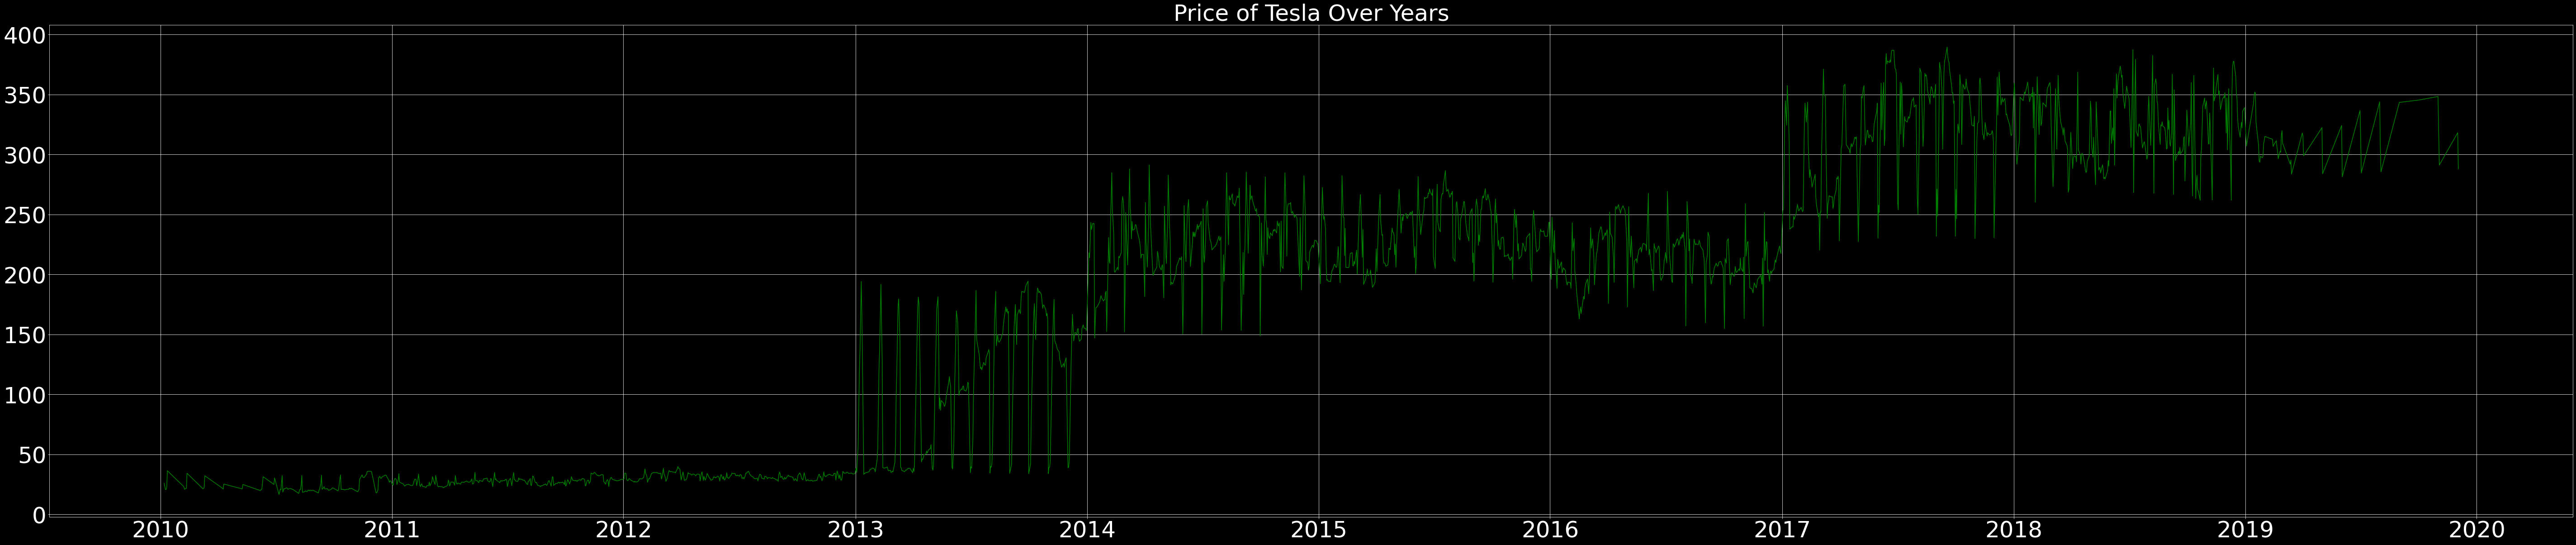

In [ ]:
plt.figure(figsize = (100,20))
plt.style.use("dark_background")
plt.plot(tesla_df["Date"],tesla_df["High"],color = "green")
plt.title("Price of Tesla Over Years", fontsize = 50)
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.grid()
plt.show()

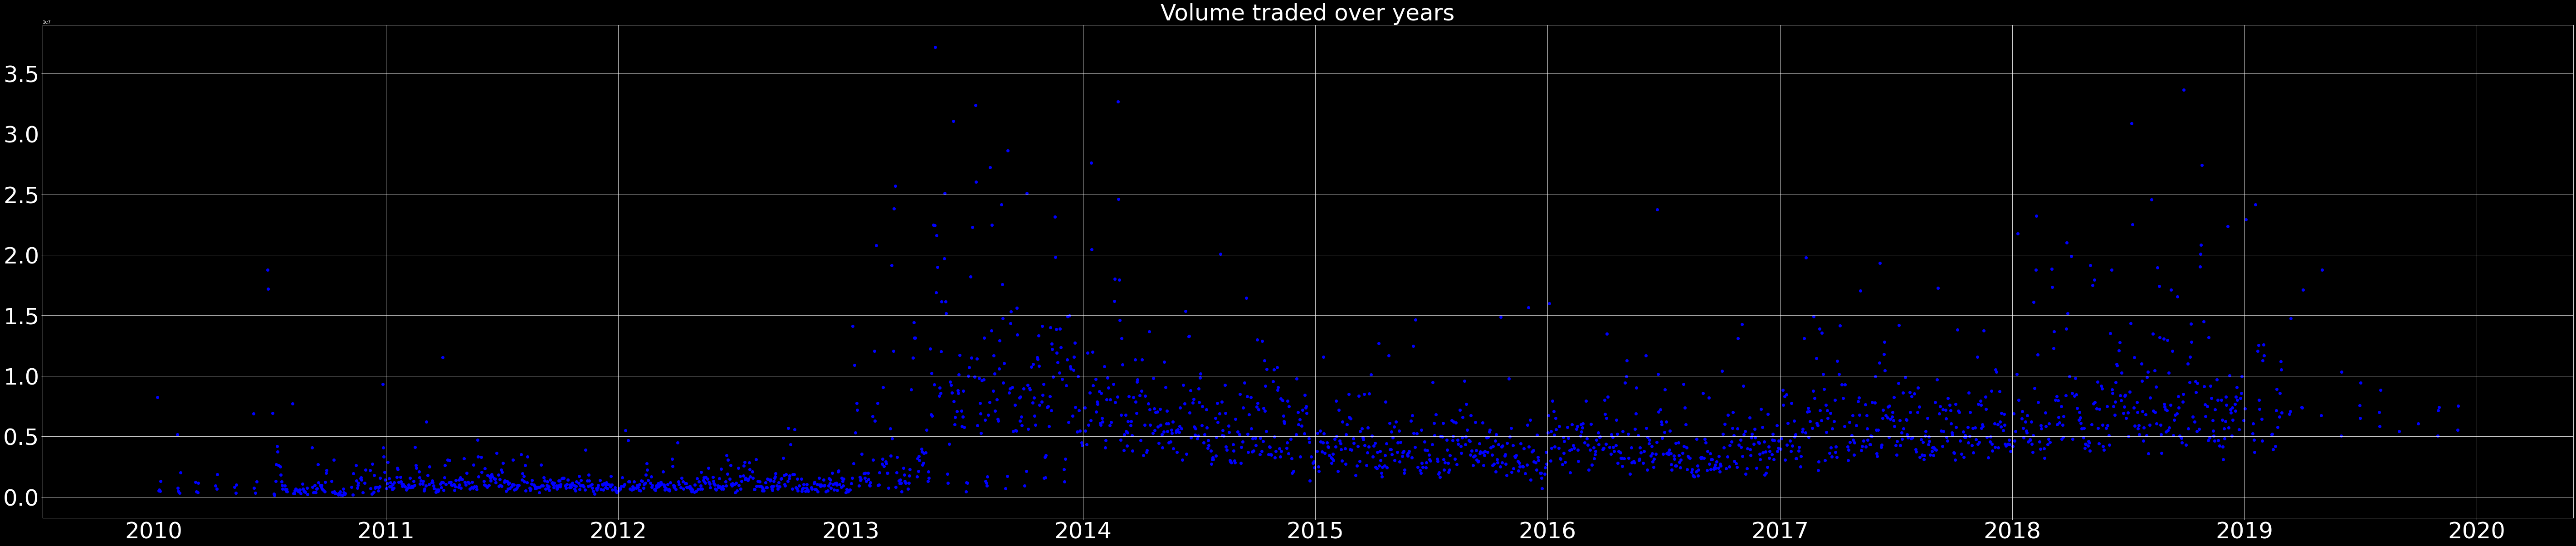

In [ ]:
plt.figure(figsize = (100,20))
plt.style.use("dark_background")
plt.scatter(tesla_df["Date"],tesla_df["Volume"],color = "blue")
plt.title("Volume traded over years", fontsize = 50)
plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
plt.grid()
plt.show()

In [ ]:
tesla_df.describe()

,Open,High,Low,Close,Adj Close,Volume,year
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03,2193.000000
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06,2014.337437
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06,2.541651
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05,2010.000000
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06,2012.000000
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06,2014.000000
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06,2017.000000
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07,2019.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


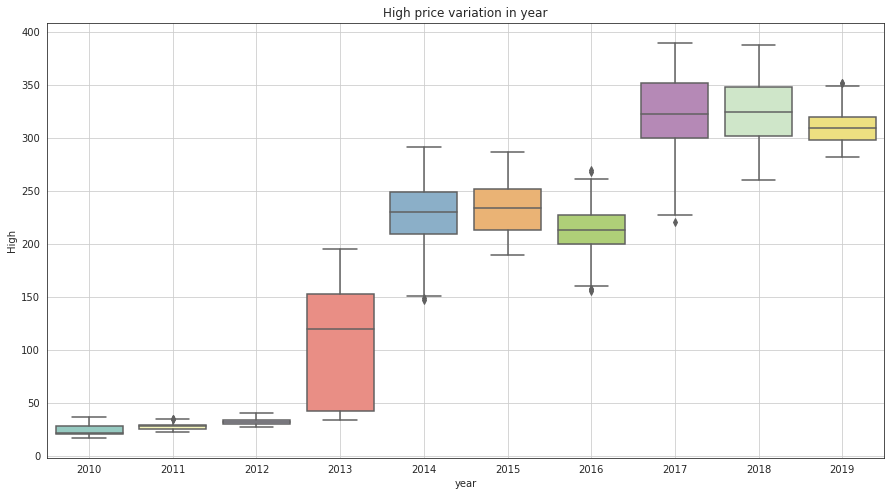

In [ ]:
sns.set_style("white")
plt.figure(figsize = (15,8))
sns.boxplot(tesla_df["year"],tesla_df["High"])
plt.title("High price variation in year")
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


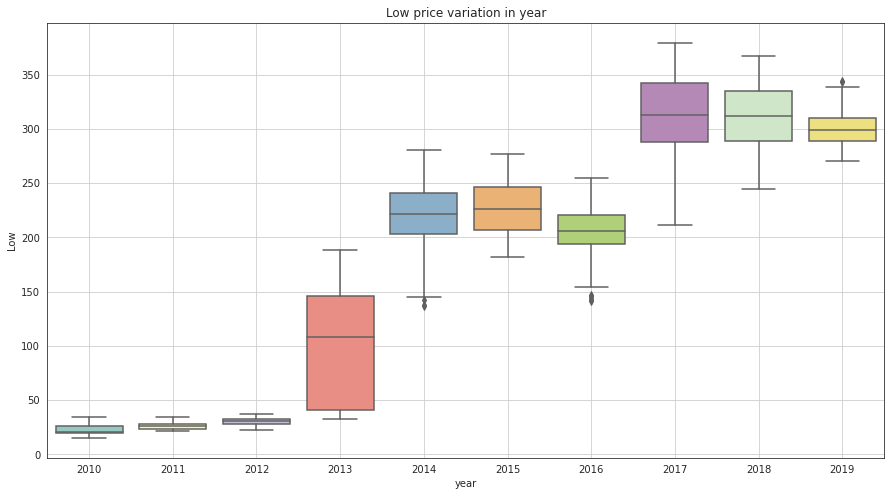

In [ ]:
sns.set_style("white")
plt.figure(figsize = (15,8))
sns.boxplot(tesla_df["year"],tesla_df["Low"])
plt.title("Low price variation in year")
plt.grid()
plt.show()

In [ ]:
tesla_df.corr()

,Open,High,Low,Close,Adj Close,Volume,year
Open,1.000000,0.999578,0.999566,0.999054,0.999054,0.457938,0.920494
High,0.999578,1.000000,0.999490,0.999631,0.999631,0.466999,0.921259
Low,0.999566,0.999490,1.000000,0.999580,0.999580,0.448387,0.920112
Close,0.999054,0.999631,0.999580,1.000000,1.000000,0.458157,0.920846
Adj Close,0.999054,0.999631,0.999580,1.000000,1.000000,0.458157,0.920846
Volume,0.457938,0.466999,0.448387,0.458157,0.458157,1.000000,0.423072
year,0.920494,0.921259,0.920112,0.920846,0.920846,0.423072,1.000000


In [ ]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
#import os       #Run Line 2 and 3 after installing pandas profiling
#os._exit(00)
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(tesla_df, title="Tesla Stock Data Report", html={"style":{"full_width":True}})
profile.to_file(output_file = "Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]